# Unit 5 - Financial Planning


In [79]:
# Initial imports
import os
import requests
import pandas as pd
import requests
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [80]:
# Load .env enviroment variables
load_dotenv("C:\\Users\\rhnil\\Desktop\\Columbia_Bootcamp\\alpaca.env")


True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [81]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [82]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/bitcoin/"
btc_url = btc_url + "?format=json"

eth_url = "https://api.alternative.me/v2/ticker/Ethereum/"
eth_url = eth_url + "?format=json"

In [84]:
# Fetch current BTC price
btc_data = requests.get(btc_url)
btc_content = btc_data.json()

#print(json.dumps(btc_content, indent=4))

btc_price = btc_content["data"]["1"]["quotes"]["USD"]["price"]
print(f"BTC current price: ${btc_price:,.2f}")

# Fetch current ETH price
eth_data = requests.get(eth_url)
eth_content = eth_data.json()

#print(json.dumps(eth_content, indent=4))

eth_price = eth_content["data"]["1027"]["quotes"]["USD"]["price"]
print(f"ETH current price: ${eth_price:,.2f}")

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:,.2f}")

BTC current price: $50,828.00
ETH current price: $2,281.76
The current value of your 1.2 BTC is $60,993.60
The current value of your 5.3 ETH is $12,093.33


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [86]:
# Current amount of shares
my_agg =  200
my_spy = 50


In [87]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [134]:
# Format current date as ISO format
start_date = pd.Timestamp("2021-04-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-04-23", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
portfolio_df = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=35,
).df

# Check for nulls
portfolio_df.isnull().sum()

AGG  open      0
     high      0
     low       0
     close     0
     volume    0
SPY  open      0
     high      0
     low       0
     close     0
     volume    0
dtype: int64

In [135]:
# Preview DataFrame
portfolio_df.tail()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2021-04-19 00:00:00-04:00  114.00  114.500  114.0000  114.44  4820664  416.26   
2021-04-20 00:00:00-04:00  114.42  114.670  114.3900  114.62  3674209  413.91   
2021-04-21 00:00:00-04:00  114.60  114.740  114.5300  114.74  5250384  411.51   
2021-04-22 00:00:00-04:00  114.74  114.800  114.5900  114.77  3518947  415.88   
2021-04-23 00:00:00-04:00  114.81  115.086  114.6415  114.75  3506457  412.87   

                                                               
                               high     low   close    volume  
time                                                           
2021-04-19 00:00:00-04:00  416.7400  413.79  415.24  66226327  
2021-04-20 00:00:00-04:00  415.0859  410.59  412.22  69715050  
2021-04-21 00:00:00-04:00  416.2900  411.36  416.08  54772634  
2021-04-22 00:00:00-04:00  416.7800  411.13  412.30  90085820  
2021-04-23 00:00:00-04:00  418.2500  412.79  416.72  62186191

In [136]:
# Pick AGG and SPY close prices
agg_close_price = portfolio_df['AGG']['close'].iloc[-1]
spy_close_price = portfolio_df['SPY']['close'].iloc[-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.75
Current SPY closing price: $416.72


In [137]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share; NB: I reveresed to the order of the print statements to be consistent with the code above.
print(f"The current value of your {my_agg} AGG bonds is ${my_agg_value:,.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")


The current value of your 200 AGG bonds is $22,950.00
The current value of your 50 SPY shares is $20,836.00


### Savings Health Analysis

In [138]:
# Set monthly household income
monthly_income = 12000


# Create savings DataFrame
crypto_value = my_btc_value + my_eth_value
shares_value = my_agg_value + my_spy_value

# Set the data for the shares value DataFrame

df_savings = pd.DataFrame({'asset':['crypto', 'shares'],
                            'value':[crypto_value, shares_value]})
df_savings = df_savings.set_index('asset')


# Display savings DataFrame
display(df_savings)

value
asset            
crypto  73086.928
shares  43786.000

<AxesSubplot:ylabel='value'>

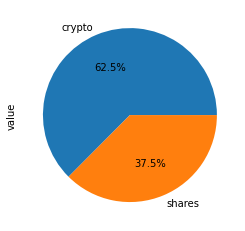

In [139]:
# Plot savings pie chart
df_savings['value'].plot.pie(y="Savings Portfolio Mix",autopct='%1.1f%%')



In [140]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3


# Calculate total amount of savings
total_savings = df_savings['value'].sum()


# Validate saving health
if total_savings > emergency_fund:
    print(f"Your savings of ${total_savings:,.0f} is greater than the recommened emergencey fund amount of 3x monthly income (${emergency_fund:,.0f})")
elif total_savings == emergency_fund:
    print(f"Your savings of ${total_savings:,.0f} is equal to the recommened emergencey fund amount of 3x monthly income $({emergency_fund:,.0f})")
else:
    print(f"Your savings of ${total_savings:,.0f} is less than the recommened emergencey fund amount of 3x monthly income $({emergency_fund:,.0f}). You need additional savings of ${emergency_fund-total_savings:,.0f} to meet the minimum recommend emergency fund amount.")

Your savings of $116,873 is greater than the recommened emergencey fund amount of 3x monthly income ($36,000)


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [142]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2015-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-23', tz='America/New_York').isoformat()

In [143]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Check for nulls
df_stock_data.isnull().sum()

AGG  open      1
     high      1
     low       1
     close     1
     volume    1
SPY  open      1
     high      1
     low       1
     close     1
     volume    1
dtype: int64

In [144]:
df_stock_data = df_stock_data.dropna()

In [145]:
# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2017-05-04 00:00:00-04:00  108.55  108.70  108.55  108.665  1789624.0  238.83   
2017-05-05 00:00:00-04:00  108.72  108.74  108.57  108.720  1287794.0  239.18   
2017-05-08 00:00:00-04:00  108.63  108.67  108.49  108.495  1579134.0  239.76   
2017-05-09 00:00:00-04:00  108.43  108.51  108.40  108.495  2395343.0  239.96   
2017-05-10 00:00:00-04:00  108.60  108.66  108.44  108.520  1427511.0  239.38   

                                                                 
                               high     low   close      volume  
time                                                             
2017-05-04 00:00:00-04:00  238.9225  237.78  238.75  46170233.0  
2017-05-05 00:00:00-04:00  239.7200  238.68  239.72  43733544.0  
2017-05-08 00:00:00-04:00  239.9200  239.17  239.67  32087919.0  
2017-05-09 00:00:00-04:00  240.1900  239.04  239.46  39723891.0  
2017-05-10 00:00:00-04:00  239.8700  239.15  239.85  34222778.0

In [146]:
# Clean up data frame to include only closing prices for AGG and closing price for SPY

df_stock_data = df_stock_data.drop(columns=[('AGG','open'),('AGG','high'), ('AGG','low'), ('AGG','volume')], axis=1)
df_stock_data = df_stock_data.drop(columns=[('SPY','open'),('SPY','high'), ('SPY','low'), ('SPY','volume')], axis=1)
df_stock_data.head()

AGG     SPY
                             close   close
time                                      
2017-05-04 00:00:00-04:00  108.665  238.75
2017-05-05 00:00:00-04:00  108.720  239.72
2017-05-08 00:00:00-04:00  108.495  239.67
2017-05-09 00:00:00-04:00  108.495  239.46
2017-05-10 00:00:00-04:00  108.520  239.85

In [152]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

# Set number of simulations
num_sims = 100

# Set number of years to simulate
sim_years = 30

# Configure a Monte Carlo simulation to forecast thirty years daily returns; AGG is 60% of portfolio, SPY is 40% of portfolio
MC_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = num_sims,
    num_trading_days = 252*sim_years
)



In [153]:
# Printing the simulation input data
print(f"Running {num_sims} simulations projecting the performance of your portfolio {tickers} over the next {sim_years} years")

Running 100 simulations projecting the performance of your portfolio ['AGG', 'SPY'] over the next 30 years


In [154]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


0          1          2          3          4          5   \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      0.991710   0.992715   0.997304   1.002269   0.991265   1.006273   
2      0.988911   0.990902   1.001635   0.995807   0.991191   1.005400   
3      0.984626   0.987809   0.998987   0.991537   0.992995   0.987510   
4      0.986903   0.990040   1.024802   0.985284   0.991306   0.987215   
...         ...        ...        ...        ...        ...        ...   
7556  41.878281  12.203356  20.944374  19.783264  11.095747  12.729310   
7557  42.211316  12.032068  20.724316  20.038123  11.103748  12.791438   
7558  42.533404  11.968165  20.886410  19.912740  11.235948  12.778863   
7559  43.059905  12.055857  21.169084  19.992563  11.207767  12.877182   
7560  42.685647  11.969933  21.395762  19.834788  11.177912  12.867652   

            6         7          8          9   ...        90         91  \
0     1.000000  1.000000   1.000000   1.000000  ...  1.000000   1.000000   
1     1.018646  1.002225   1.005899   0.992979  ...  0.996740   1.003945   
2     1.029068  0.985223   1.005957   1.003041  ...  1.004141   1.003989   
3     1.036159  0.994199   1.016892   1.002247  ...  1.012819   0.999744   
4     1.044927  1.006812   1.020036   0.997681  ...  1.006151   0.994376   
...        ...       ...        ...        ...  ...       ...        ...   
7556  9.651420  5.178068  11.317270  34.377668  ...  8.777389  41.219548   
7557  9.687034  5.230080  11.398117  34.266734  ...  8.739864  41.497948   
7558  9.737998  5.201198  11.468209  34.496001  ...  8.738629  41.405862   
7559  9.719918  5.291922  11.529868  34.613182  ...  8.727199  41.256583   
7560  9.855536  5.258351  11.463756  34.356280  ...  8.783004  41.438046   

             92         93         94         95         96         97  \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      1.007360   0.995964   1.008095   1.001129   1.000504   1.002212   
2      1.008848   0.996954   1.008861   1.004771   0.999428   0.995620   
3      1.007610   1.002215   1.000895   1.008177   0.989798   0.990931   
4      1.006129   1.007016   0.991407   0.994884   0.984507   0.986450   
...         ...        ...        ...        ...        ...        ...   
7556  10.855045  10.962588  23.810233  18.633806  42.416555  23.850763   
7557  10.633962  10.900748  23.585523  18.954825  42.139105  23.862038   
7558  10.553495  10.941129  23.757690  18.829703  42.521311  23.902818   
7559  10.684750  10.879839  23.876771  18.820346  42.560327  23.777567   
7560  10.534884  10.783877  23.903906  18.835222  42.112401  23.782548   

            98         99  
0     1.000000   1.000000  
1     0.995577   0.997950  
2     0.973823   0.990648  
3     0.987867   0.990328  
4     0.996092   0.984386  
...        ...        ...  
7556  9.556022  30.081725  
7557  9.471190  30.317335  
7558  9.509201  29.652483  
7559  9.507435  29.438184  
7560  9.570857  29.204203  

[7561 rows x 100 columns]

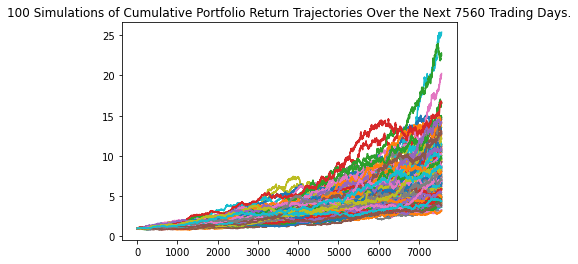

In [103]:
# Plot simulation outcomes
line_plot = MC_portfolio.plot_simulation()


In [157]:
# Print summary statistics and CI 
tbl = MC_portfolio.summarize_cumulative_return()
print(tbl)

count           100.000000
mean             19.919288
std              11.989397
min               4.004968
25%              10.848212
50%              16.702728
75%              25.476054
max              59.061706
95% CI Lower      4.950361
95% CI Upper     46.170140
Name: 7560, dtype: float64


The 95% confidence interval for 5 year returns on a portfolio of 40/60 ['AGG', 'SPY'] is 4.95x - 46.17x



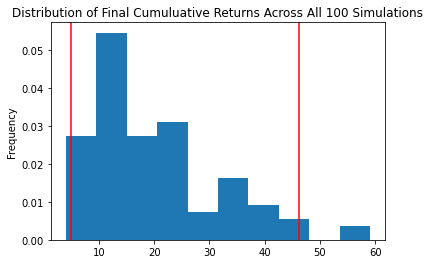

In [159]:
# Calculate probability distribution and confidence intervals
ci_lower = round(tbl[8],2)
ci_upper = round(tbl[9],2)

print(f'The 95% confidence interval for 5 year returns on a portfolio of 40/60 {tickers} is {ci_lower}x - {ci_upper}x\n')
dist_plot = MC_portfolio.plot_distribution()



### Retirement Analysis

In [160]:
# Fetch summary statistics from the Monte Carlo simulation results
simulated_portfolio_returns = {
    "mean": list(MC_portfolio.simulated_return.mean(axis=1)),
    "median": list(MC_portfolio.simulated_return.median(axis=1)),
    "min": list(MC_portfolio.simulated_return.min(axis=1)),
    "max": list(MC_portfolio.simulated_return.max(axis=1))
}

# Create DataFrame with the summary statistics
portfolio_summary_stats = pd.DataFrame(simulated_portfolio_returns)

# Display summary statistics 
portfolio_summary_stats.tail()


mean     median       min        max
7556  19.946683  16.706082  4.031234  59.188160
7557  19.967433  16.701018  4.022151  59.495946
7558  19.965780  16.669361  4.036938  59.570910
7559  19.949626  16.776860  4.031643  59.402878
7560  19.919288  16.702728  4.004968  59.061706

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [161]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = tbl[8] * initial_investment
ci_upper = tbl[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio over the next 30 years will end within in the range of ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within in the range of $99,007.22 and $923,402.81


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [162]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = tbl[8] * initial_investment
ci_upper = tbl[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 30 years will end within in the range of $148,510.83 and $1,385,104.21


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [168]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Set number of simulations
num_sims = 100

# Set number of years to simulate
sim_years = 5

MC_portfolio_5yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = num_sims,
    num_trading_days = 252*sim_years
)

# Printing the simulation input data
print(f"Running {num_sims} simulations projecting the performance of your portfolio 40/60 {tickers} over the next {sim_years} years")

Running 100 simulations projecting the performance of your portfolio ['AGG', 'SPY'] over the next 5 years


In [169]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_portfolio_5yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


0         1         2         3         4         5         6   \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.997920  0.998524  1.000658  1.003985  1.000406  1.008316  1.009667   
2     1.010126  1.006557  1.018027  1.001793  1.004670  1.027708  1.013755   
3     1.017618  1.008896  1.012494  1.013656  1.001622  1.023120  1.016055   
4     1.022523  1.014373  1.020686  1.016207  0.991345  1.032417  1.024894   
...        ...       ...       ...       ...       ...       ...       ...   
1256  2.336381  1.598060  1.143679  2.081551  1.517147  1.633948  1.283453   
1257  2.351194  1.619716  1.138066  2.049164  1.516379  1.648663  1.278554   
1258  2.369850  1.601337  1.151024  2.046263  1.526388  1.655382  1.266336   
1259  2.378821  1.626645  1.133591  2.018685  1.524159  1.668665  1.282311   
1260  2.347232  1.626622  1.145387  2.001019  1.524898  1.686304  1.276486   

            7         8         9   ...        90        91        92  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.999817  0.999247  0.994288  ...  0.996382  0.998613  1.003242   
2     1.006521  1.005892  0.993710  ...  1.006245  1.014515  0.992253   
3     1.007719  1.000691  0.975157  ...  1.012733  1.015767  1.002720   
4     1.017887  1.005848  0.965348  ...  1.019964  1.006231  1.011077   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.290050  1.586448  1.557176  ...  1.686463  1.319794  1.243274   
1257  1.286977  1.596705  1.551611  ...  1.684022  1.320520  1.225895   
1258  1.275116  1.596967  1.570547  ...  1.666254  1.304841  1.207031   
1259  1.289177  1.589745  1.578847  ...  1.664668  1.299488  1.210550   
1260  1.268274  1.588149  1.588305  ...  1.678799  1.308859  1.219682   

            93        94        95        96        97        98        99  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.004235  1.001673  1.002920  1.012113  1.013156  1.024345  1.005309  
2     1.008935  1.001891  0.994496  1.008317  1.013121  1.020598  1.008396  
3     1.009279  1.003051  0.990170  1.004339  1.018910  1.020133  1.012601  
4     1.007206  0.997236  0.974747  1.000653  1.015324  1.009145  1.005040  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.090594  2.248650  1.180553  2.877473  1.189868  3.113637  1.585974  
1257  1.093230  2.237504  1.174398  2.865663  1.194470  3.104031  1.611417  
1258  1.090987  2.230532  1.178759  2.847863  1.189722  3.095725  1.598286  
1259  1.096187  2.218716  1.172619  2.867378  1.172698  3.097983  1.581418  
1260  1.091091  2.246002  1.175223  2.830941  1.171651  3.100965  1.583257  

[1261 rows x 100 columns]

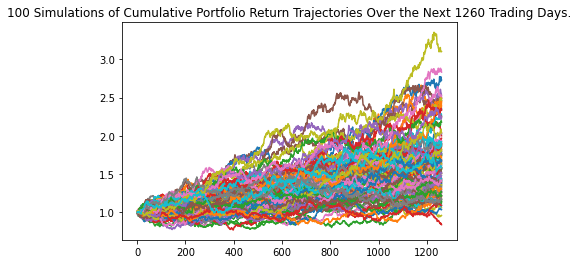

In [170]:
# Plot simulation outcomes
line_plot = MC_portfolio_5yr.plot_simulation()


In [176]:
# Print summary statistics and CI 
tbl = MC_portfolio_5yr.summarize_cumulative_return()
print(tbl)

count           100.000000
mean              1.682348
std               0.453432
min               0.840579
25%               1.350000
50%               1.603982
75%               1.898414
max               3.100965
95% CI Lower      1.049805
95% CI Upper      2.632379
Name: 1260, dtype: float64


The 95% confidence interval for 5 year returns on a portfolio of ['AGG', 'SPY'] is 1.05x - 2.63x



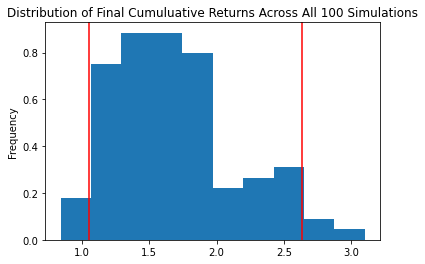

In [177]:
# Calculate probability distribution and confidence intervals
ci_lower = round(tbl[8],2)
ci_upper = round(tbl[9],2)

print(f'The 95% confidence interval for 5 year returns on a portfolio of {tickers} is {ci_lower}x - {ci_upper}x\n')

# Plot probability distribution and confidence intervals
dist_plot = MC_portfolio_5yr.plot_distribution()

In [178]:
# Fetch summary statistics from the Monte Carlo simulation results
simulated_portfolio_returns = {
    "mean": list(MC_portfolio_5yr.simulated_return.mean(axis=1)),
    "median": list(MC_portfolio_5yr.simulated_return.median(axis=1)),
    "min": list(MC_portfolio_5yr.simulated_return.min(axis=1)),
    "max": list(MC_portfolio_5yr.simulated_return.max(axis=1))
}

# Create DataFrame with the summary statistics
portfolio_summary_stats = pd.DataFrame(simulated_portfolio_returns)

# Print summary statistics 
print(portfolio_summary_stats)



          mean    median       min       max
0     1.000000  1.000000  1.000000  1.000000
1     1.000732  1.000532  0.977874  1.024345
2     1.001263  1.002638  0.965104  1.029534
3     1.000631  1.000776  0.965159  1.034580
4     1.000067  0.998090  0.956036  1.033952
...        ...       ...       ...       ...
1256  1.684851  1.587862  0.849987  3.113637
1257  1.686859  1.609028  0.858450  3.104031
1258  1.684079  1.606748  0.856918  3.095725
1259  1.683022  1.614692  0.849934  3.097983
1260  1.682348  1.603982  0.840579  3.100965

[1261 rows x 4 columns]


In [179]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = tbl[8] * initial_investment
ci_upper = tbl[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $60,000.00 in the portfolio over the next 5 years will end within in the range of $62,988.32 and $157,942.75


### Ten Years Retirement Option

In [180]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Set number of simulations
num_sims = 100

# Set number of years to simulate
sim_years = 10

MC_portfolio_10yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = num_sims,
    num_trading_days = 252*sim_years
)

# Printing the simulation input data
print(f"Running {num_sims} simulations projecting the performance of your portfolio {tickers} over the next {sim_years} years")

Running 100 simulations projecting the performance of your portfolio ['AGG', 'SPY'] over the next 10 years


In [119]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_portfolio_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


0         1         2         3         4         5         6   \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.998640  1.002572  0.993030  1.006482  1.007278  1.013321  0.998881   
2     1.008200  0.988951  0.992918  1.018456  0.998992  1.006909  0.994029   
3     1.013632  0.979493  0.985997  1.024020  1.001962  1.007729  1.001019   
4     1.008400  0.968895  0.984212  1.029983  0.995075  1.011154  1.008554   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.795563  1.827691  1.849369  2.323712  2.227101  1.575558  2.261567   
2517  1.786004  1.847926  1.844440  2.314228  2.235199  1.576358  2.253948   
2518  1.790165  1.844703  1.832965  2.324956  2.249359  1.573938  2.261511   
2519  1.783279  1.846148  1.828693  2.310904  2.230877  1.584830  2.246458   
2520  1.767027  1.851870  1.812096  2.296916  2.215430  1.582304  2.251800   

            7         8         9   ...        90        91        92  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.994240  1.002126  0.998669  ...  1.000212  1.005945  1.002183   
2     0.994588  1.006851  0.996215  ...  1.009560  1.008617  0.995016   
3     1.001408  1.012854  1.004078  ...  1.008851  1.012570  0.988774   
4     1.007046  1.017667  1.001624  ...  1.013547  1.010819  0.986635   
...        ...       ...       ...  ...       ...       ...       ...   
2516  2.642082  1.840709  3.251158  ...  2.652716  2.350239  1.787931   
2517  2.655125  1.840315  3.235335  ...  2.633898  2.357266  1.778250   
2518  2.661086  1.849820  3.231703  ...  2.637269  2.370971  1.779004   
2519  2.679936  1.836345  3.208882  ...  2.681323  2.381047  1.794986   
2520  2.698252  1.838973  3.215202  ...  2.679337  2.369464  1.820843   

            93        94        95        96        97        98        99  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.006153  0.999595  0.998563  1.009095  1.000166  1.008536  0.991447  
2     0.999544  1.001726  0.999492  1.004318  1.006704  1.013256  0.990466  
3     0.997486  0.999007  1.001253  0.997825  1.010629  1.022824  0.987205  
4     0.993663  1.002273  1.003058  1.003863  1.009642  1.022829  0.983690  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.971562  3.701379  1.564438  2.260566  2.403941  1.182187  1.373814  
2517  1.969779  3.681035  1.564218  2.248415  2.419756  1.186316  1.362815  
2518  1.970198  3.685996  1.571824  2.253632  2.396037  1.193294  1.361745  
2519  1.963732  3.722601  1.576707  2.238696  2.396305  1.194359  1.357040  
2520  1.971166  3.721454  1.568254  2.227401  2.374906  1.202184  1.351325  

[2521 rows x 100 columns]

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


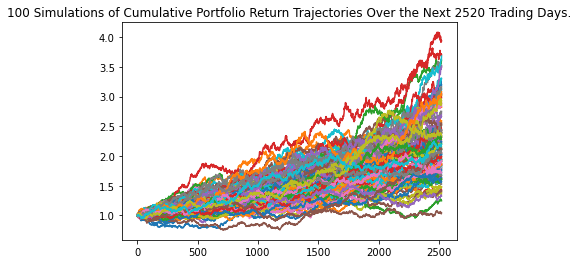

In [181]:
# Plot simulation outcomes
line_plot = MC_portfolio_10yr.plot_simulation()

In [182]:
# Print summary statistics and CI 
tbl = MC_portfolio_10yr.summarize_cumulative_return()
print(tbl)

count           100.000000
mean              2.227311
std               0.616319
min               1.039789
25%               1.829777
50%               2.075204
75%               2.545043
max               3.938617
95% CI Lower      1.344176
95% CI Upper      3.649239
Name: 2520, dtype: float64


The 95% confidence interval for 10 year returns on a portfolio of 40/60 ['AGG', 'SPY'] is 1.34x - 3.65x



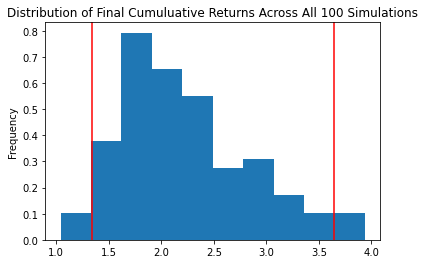

In [183]:
# Calculate probability distribution and confidence intervals
ci_lower = round(tbl[8],2)
ci_upper = round(tbl[9],2)

print(f'The 95% confidence interval for 10 year returns on a portfolio of 40/60 {tickers} is {ci_lower}x - {ci_upper}x\n')

# Plot probability distribution and confidence intervals
dist_plot = MC_portfolio_10yr.plot_distribution()

In [184]:
# Fetch summary statistics from the Monte Carlo simulation results
simulated_portfolio_returns = {
    "mean": list(MC_portfolio_10yr.simulated_return.mean(axis=1)),
    "median": list(MC_portfolio_10yr.simulated_return.median(axis=1)),
    "min": list(MC_portfolio_10yr.simulated_return.min(axis=1)),
    "max": list(MC_portfolio_10yr.simulated_return.max(axis=1))
}

# Create DataFrame with the summary statistics
portfolio_summary_stats = pd.DataFrame(simulated_portfolio_returns)

# Print summary statistics 
print(portfolio_summary_stats)


          mean    median       min       max
0     1.000000  1.000000  1.000000  1.000000
1     0.999677  0.999334  0.986606  1.017395
2     1.000787  1.000126  0.984180  1.030829
3     1.001568  1.000380  0.975944  1.030346
4     1.002182  1.001721  0.975793  1.029294
...        ...       ...       ...       ...
2516  2.218994  2.074897  1.032771  3.951798
2517  2.219628  2.057621  1.036126  3.955337
2518  2.223009  2.065106  1.026180  3.932340
2519  2.224285  2.066964  1.033606  3.928466
2520  2.227311  2.075204  1.039789  3.938617

[2521 rows x 4 columns]


In [185]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = tbl[8] * initial_investment
ci_upper = tbl[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")



There is a 95% chance that an initial investment of $60,000.00 in the portfolio over the next 10 years will end within in the range of $80,650.58 and $218,954.35
